In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
%matplotlib inline

In [7]:
df = pd.read_csv('new_df.csv',index_col=[0])
df

,Title,Location,Security,Garage,Concierge,Price,City,Currency,Nmbr of rooms,Nmbr of pieces,Nmbr of bathrooms,Newness,Surface
0,Appartement avec vue mer depuis toutes les pièces,Centre,0,0,0,2200000,Tanger,DH,2,3,2,Bon état,95
1,"Studio de 43m² en vente, Résidence Panama",Malabata,1,0,0,602000,Tanger,DH,1,1,1,Nouveau,43
2,Appartement de 94m² en vente Résidence Al Bahja,Tanja Balia,0,0,0,694575,Tanger,DH,3,4,2,Nouveau,94
3,Appartement avec terrasse et vue mer,De La,0,0,0,2750000,Tanger,DH,2,3,2,Bon état,129
4,Magnifique duplex avec vue panoramique sur la ...,Centre,0,0,0,3400000,Tanger,DH,2,3,3,Bon état,223
...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,Superbe appartement à vendre à Mesnana. 3 bell...,Mesnana,0,0,0,1550000,Tanger,DH,3,5,2,Bon état,105
355,Appartement Meublé à Vendre – Vue mer – Tanger,Centre,0,0,0,1750000,Tanger,DH,2,4,2,Bon état,100
356,Appartement Vide à La Vente Route Rabat Tanger,Marjane,0,0,1,1030000,Tanger,DH,3,4,2,Bon état,137
357,Appartement en vente à Les Rosiers. 2 belles c...,Les Rosiers,1,0,0,270000,Tanger,DH,2,3,1,À rénover,50


In [8]:
df.shape

(359, 13)

In [9]:
df.columns

Index(['Title', 'Location', 'Security', 'Garage', 'Concierge', 'Price', 'City',
       'Currency', 'Nmbr of rooms', 'Nmbr of pieces', 'Nmbr of bathrooms',
       'Newness', 'Surface'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359 entries, 0 to 358
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              359 non-null    object
 1   Location           359 non-null    object
 2   Security           359 non-null    int64 
 3   Garage             359 non-null    int64 
 4   Concierge          359 non-null    int64 
 5   Price              359 non-null    int64 
 6   City               359 non-null    object
 7   Currency           359 non-null    object
 8   Nmbr of rooms      359 non-null    int64 
 9   Nmbr of pieces     359 non-null    int64 
 10  Nmbr of bathrooms  359 non-null    int64 
 11  Newness            359 non-null    object
 12  Surface            359 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 39.3+ KB


In [11]:
df.describe()

,Security,Garage,Concierge,Price,Nmbr of rooms,Nmbr of pieces,Nmbr of bathrooms,Surface
count,359.000000,359.000000,359.000000,3.590000e+02,359.000000,359.000000,359.000000,359.000000
mean,0.080780,0.002786,0.022284,1.604193e+06,2.504178,3.749304,1.713092,120.451253
std,0.272877,0.052778,0.147812,1.366335e+06,0.838567,1.448788,0.675692,66.315247
min,0.000000,0.000000,0.000000,8.000000e+03,1.000000,1.000000,1.000000,34.000000
25%,0.000000,0.000000,0.000000,7.135000e+05,2.000000,3.000000,1.000000,80.000000
50%,0.000000,0.000000,0.000000,1.263500e+06,2.000000,4.000000,2.000000,103.000000
75%,0.000000,0.000000,0.000000,2.154000e+06,3.000000,4.000000,2.000000,145.500000
max,1.000000,1.000000,1.000000,1.590000e+07,8.000000,14.000000,4.000000,670.000000


# Exploring our data

###### missing values

In [12]:
df.isnull().sum()

Title                0
Location             0
Security             0
Garage               0
Concierge            0
Price                0
City                 0
Currency             0
Nmbr of rooms        0
Nmbr of pieces       0
Nmbr of bathrooms    0
Newness              0
Surface              0
dtype: int64

###### detecting outliers

In [13]:
df.columns

Index(['Title', 'Location', 'Security', 'Garage', 'Concierge', 'Price', 'City',
       'Currency', 'Nmbr of rooms', 'Nmbr of pieces', 'Nmbr of bathrooms',
       'Newness', 'Surface'],
      dtype='object')

In [21]:
outliers_in_data = df.copy()

In [25]:
outliers_in_data = outliers_in_data[['Nmbr of rooms', 'Nmbr of pieces','Nmbr of bathrooms']]

<AxesSubplot:>

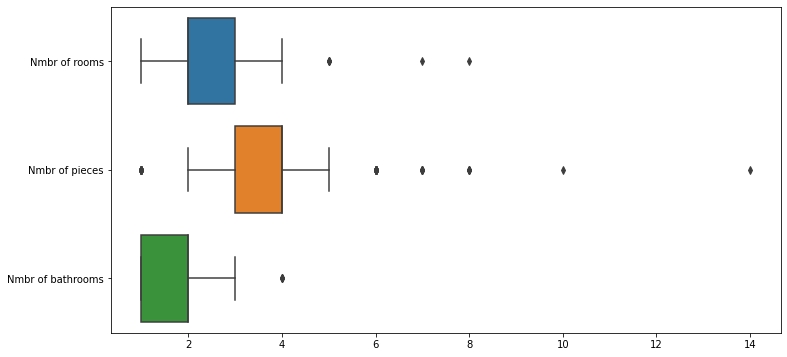

In [26]:
sns.boxplot(data=outliers_in_data,orient='h')

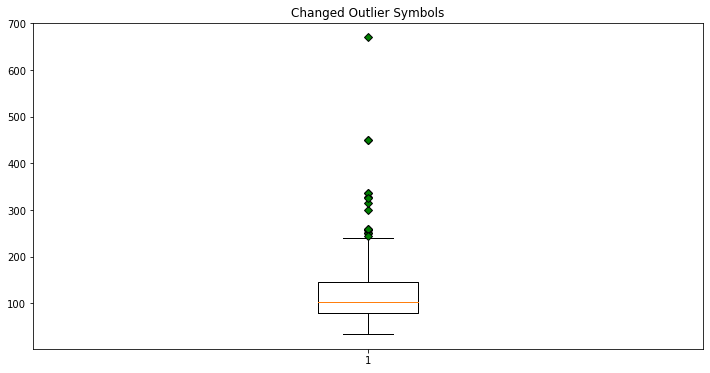

In [28]:
## outlier number of rooms
matplotlib.rcParams['figure.figsize'] = (12,6)
green_diamond = dict(markerfacecolor='g', marker='D')
fig3, ax3 = plt.subplots()
ax3.set_title('Changed Outlier Symbols')
ax3.boxplot(df['Surface'], flierprops=green_diamond)
plt.show()

#### exploring the numerical data

In [35]:
room_numbers = df['Nmbr of rooms'].value_counts().index
room_values = df['Nmbr of rooms'].value_counts().values

In [36]:
room_numbers

Int64Index([2, 3, 1, 4, 5, 8, 7], dtype='int64')

In [33]:
room_values

array([170, 139,  23,  21,   4,   1,   1], dtype=int64)

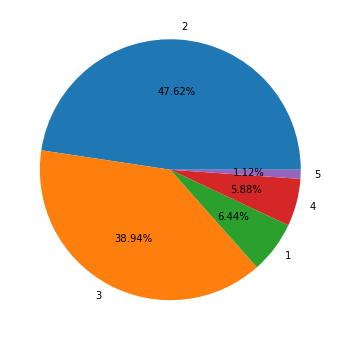

In [40]:
plt.pie(room_values[:5],labels=room_numbers[:5],autopct='%1.2f%%')
plt.show()

#### Observation : 
1. must appartement have 3 or 2 of rooms

In [47]:
number_count = df.groupby(['Nmbr of rooms','Nmbr of pieces']).size().reset_index().rename(columns={0:'number Count'})
number_count.head()

,Nmbr of rooms,Nmbr of pieces,number Count
0,1,1,14
1,1,2,7
2,1,3,2
3,2,1,1
4,2,2,12


<AxesSubplot:xlabel='Nmbr of pieces', ylabel='number Count'>

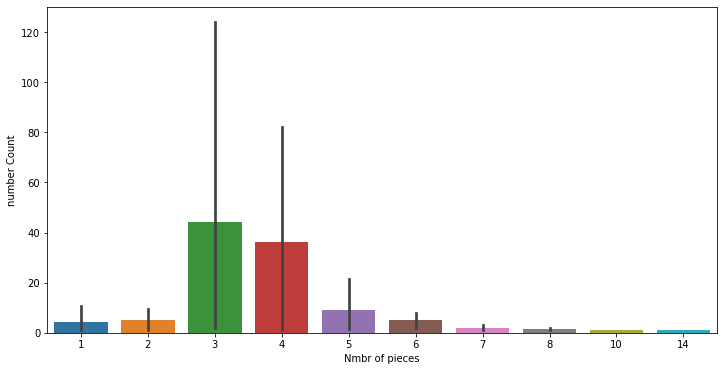

In [50]:
sns.barplot(x="Nmbr of pieces",y="number Count",data=number_count)

#### Observation : 
1. majority of appartement in tangier have 3 pieces